# Bildsegmentierung mit CellPose
CellPose ist ein auf Deep Learning basierender Segmentierungsalgorithmus für Zellen und Zellkerne in mikroskopischen Bildern.

Siehe auch
* [Cellpose in Nature Methods](https://www.nature.com/articles/s41592-020-01018-x)
* [Cellpose auf GitHub](https://github.com/MouseLand/cellpose)
* [Cellpose Beispiel-Notebook](https://github.com/MouseLand/cellpose/blob/master/notebooks/run_cellpose.ipynb)

Wie üblich beginnen wir mit dem Laden eines Beispielbildes.

In [1]:
import stackview
from cellpose import models, io
import numpy as np
from skimage.data import human_mitosis

StackViewNDArray([[ 8,  8,  8, ..., 63, 78, 75],
                  [ 8,  8,  7, ..., 67, 71, 71],
                  [ 9,  8,  8, ..., 53, 64, 66],
                  ...,
                  [ 8,  9,  8, ..., 17, 24, 59],
                  [ 8,  8,  8, ..., 17, 22, 55],
                  [ 8,  8,  8, ..., 16, 18, 38]], dtype=uint8)
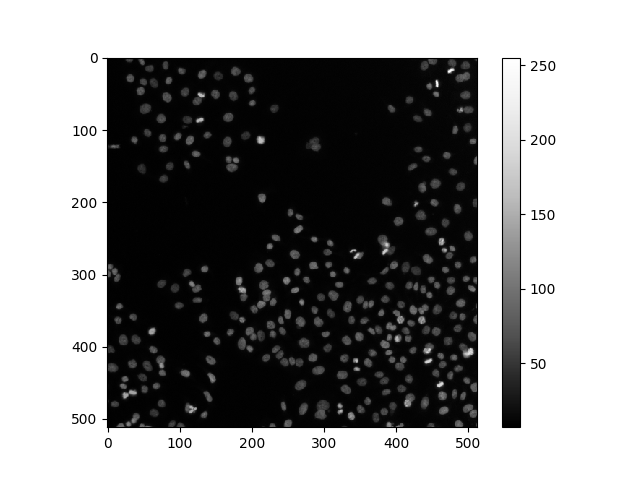
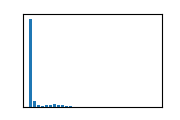

In [2]:
image = human_mitosis()
stackview.insight(image)

## Laden eines vortrainierten Modells
CellPose kommt mit einer Reihe von vortrainierten Modellen, z.B. zur Segmentierung von Bildern, die Zellen oder Zellkerne zeigen. Wir werden einfach ein Modell zur Segmentierung von Zellkernen laden.

In [3]:
model = models.Cellpose(gpu=False, model_type='nuclei')

Wir lassen das Modell das Bild "auswerten", um Masken der segmentierten Zellkerne zu erzeugen.

In [4]:
channels = [0,0] # Dies bedeutet, dass wir einkanalige Graustufenbilder verarbeiten.

masks, flows, styles, diams = model.eval(image, diameter=None, channels=channels)

StackViewNDArray([[0, 0, 0, ..., 4, 4, 4],
                  [0, 0, 0, ..., 4, 4, 4],
                  [0, 0, 0, ..., 4, 4, 4],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
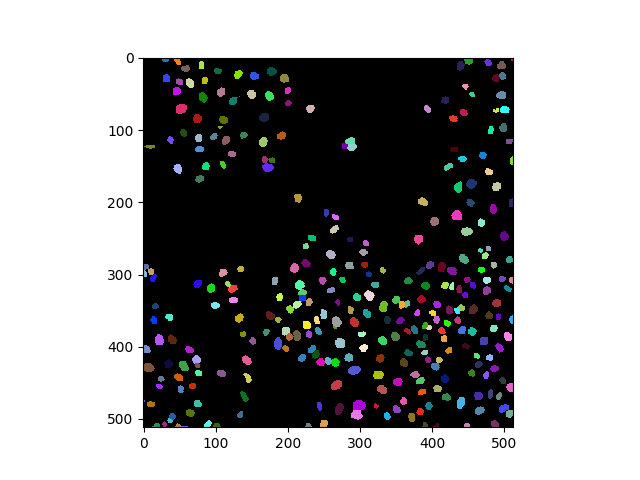

In [5]:
stackview.insight(masks.astype(np.uint32))

## Ergebnisvisualisierung
Die Ergebnisse der Zell-/Zellkernsegmentierung lassen sich am besten überprüfen, indem man das resultierende Labelbild über das Originalbild legt oder indem man Umrisse um die segmentierten Bereiche zeichnet.

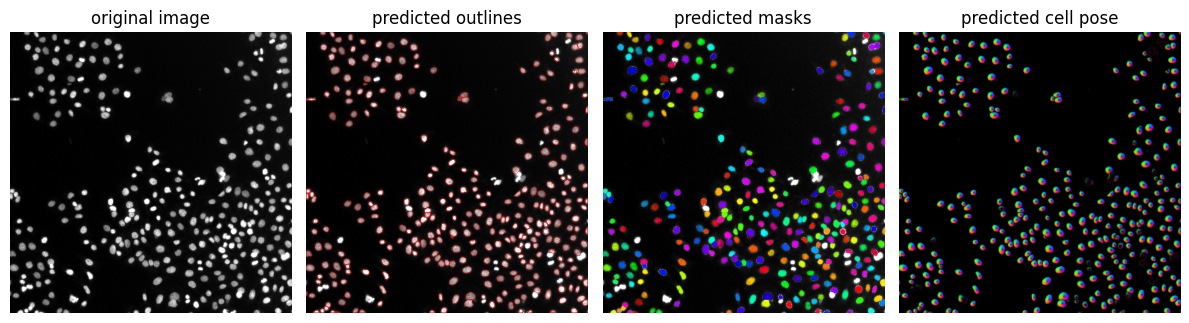

In [6]:
from cellpose import plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, image, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

## Übung
Laden Sie `../../data/blobs.tif` und wenden Sie Cellpose darauf an.